In [1]:
# started 9-4-2025

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Normalization

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split

In [2]:
fires = pd.read_csv("pt2_full_fires_socal.csv")

In [3]:
fires

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph
0,110,2005,2453540.5,10.0,Equipment Use,33.718889,-117.433611,110,73.04,89,0.062992,6.028589
1,155,2005,2453411.5,3.0,Debris Burning,34.748333,-119.410278,155,58.46,79,0.000000,4.536979
2,178,2005,2453544.5,4.2,Equipment Use,34.466667,-119.828333,178,77.54,76,0.000000,15.972654
3,1053,2005,2453559.5,3.0,Miscellaneous,34.479444,-118.768611,1053,82.76,86,0.000000,6.028589
4,1282,2005,2453582.5,2.0,Lightning,33.110833,-116.847222,1282,87.62,88,0.000000,8.763207
...,...,...,...,...,...,...,...,...,...,...,...,...
2921,1880367,2009,2455012.5,2.0,Equipment Use,33.297738,-117.003073,1880367,85.64,78,0.000000,7.271597
2922,1880400,2009,2454954.5,73.0,Missing/Undefined,33.892120,-117.079065,1880400,65.84,91,0.000000,6.774394
2923,1880420,2010,2455345.5,50.0,Missing/Undefined,32.906591,-116.942448,1880420,66.56,90,0.015748,11.249223
2924,1880428,2013,2456402.5,4.5,Children,34.633333,-118.966666,1880428,65.84,44,0.000000,7.147296


In [4]:
fires = fires.sample(frac=1, random_state=5).reset_index(drop=True)

In [5]:
fires

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph
0,1876271,2013,2456480.5,2.0,Equipment Use,34.900000,-118.183333,1876271,95.54,69,0.0,13.486638
1,1480113,2011,2455781.5,3.3,Equipment Use,34.397778,-117.370000,1480113,93.20,67,0.0,7.271597
2,19830,2007,2454302.5,340.0,Equipment Use,34.895278,-118.919722,19830,82.76,72,0.0,8.949658
3,1729782,2014,2456705.5,21.6,Miscellaneous,33.759580,-117.302700,1729782,75.74,69,0.0,6.712244
4,1129370,2007,2454396.5,8.0,Miscellaneous,33.201944,-116.971111,1129370,78.80,16,0.0,15.972654
...,...,...,...,...,...,...,...,...,...,...,...,...
2921,1582969,2012,2456133.5,47.0,Missing/Undefined,32.690000,-116.909167,1582969,80.78,84,0.0,8.328154
2922,1177396,2010,2455364.5,7.0,Arson,34.648611,-118.522222,1177396,79.88,93,0.0,12.865134
2923,1466387,2011,2455761.5,78.8,Missing/Undefined,33.921440,-116.713470,1466387,102.74,50,0.0,7.147296
2924,1638350,2013,2456521.5,110.0,Equipment Use,34.297500,-117.455556,1638350,93.92,60,0.0,7.022996


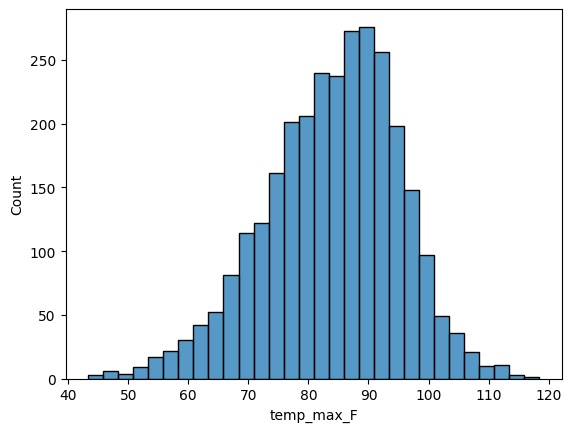

In [6]:
sns.histplot(data=fires, x="temp_max_F", bins=30, kde=False)
plt.show()

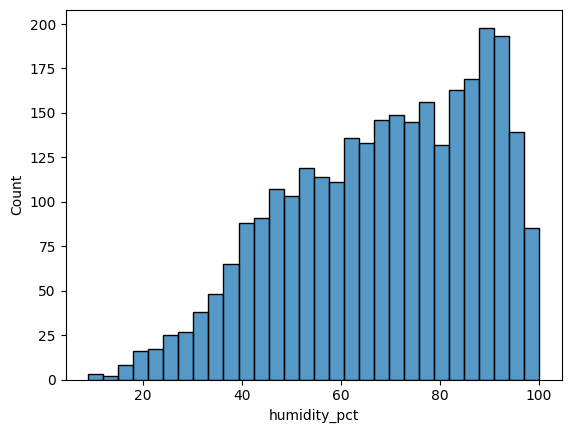

In [7]:
sns.histplot(data=fires, x="humidity_pct", bins=30, kde=False)
plt.show()

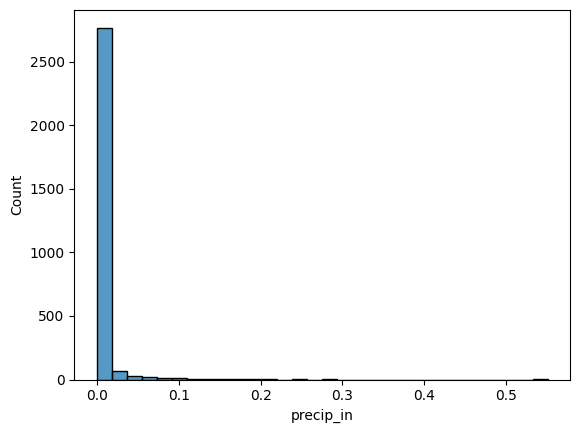

In [8]:
sns.histplot(data=fires, x="precip_in", bins=30, kde=False)
plt.show()

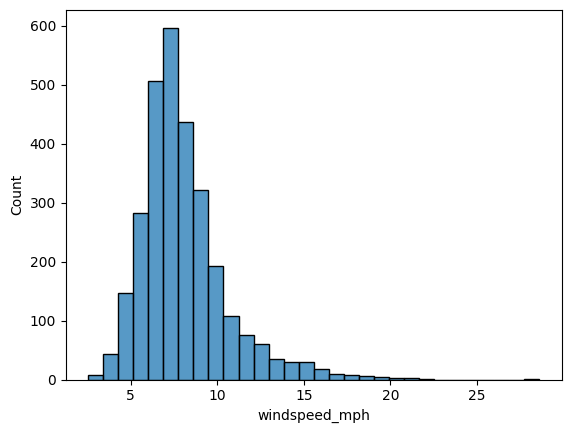

In [9]:
sns.histplot(data=fires, x="windspeed_mph", bins=30, kde=False)
plt.show()

In [10]:
# max temp is normal distribution
# humidity is mostly normal
# precip is power law w long tail, may need to clip
# wind is normal w heavy left skew, probably power law w clipping or even normal w clipping

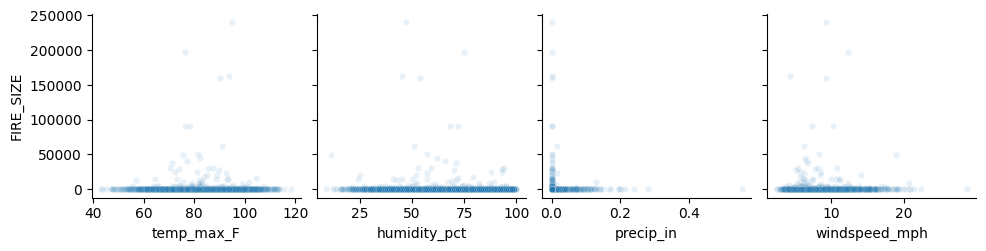

In [11]:
sns.pairplot(fires, x_vars=["temp_max_F", "humidity_pct", "precip_in", "windspeed_mph"], y_vars=["FIRE_SIZE"], plot_kws={"alpha":0.1, "s":20})
plt.show()
# doesnt show much bc y axis shouldnt be linearly scaled

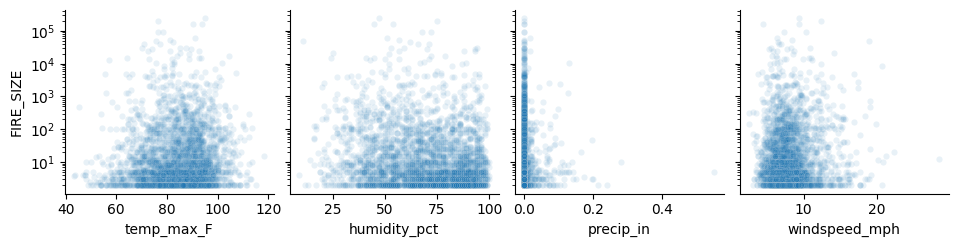

In [12]:
g = sns.pairplot(
    fires,
    x_vars=["temp_max_F", "humidity_pct", "precip_in", "windspeed_mph"],
    y_vars=["FIRE_SIZE"],
    plot_kws={"alpha": 0.1, "s": 20}
)

# Set y-axis to log scale
for ax in g.axes[:, 0]:  # first (and only) column of axes
    ax.set_yscale("log")

plt.show()
# semi log shows streaks in data

In [13]:
fires_data = fires[["FIRE_SIZE","temp_max_F", "humidity_pct", "precip_in", "windspeed_mph"]].copy()

In [14]:
fires_data

,FIRE_SIZE,temp_max_F,humidity_pct,precip_in,windspeed_mph
0,2.0,95.54,69,0.0,13.486638
1,3.3,93.20,67,0.0,7.271597
2,340.0,82.76,72,0.0,8.949658
3,21.6,75.74,69,0.0,6.712244
4,8.0,78.80,16,0.0,15.972654
...,...,...,...,...,...
2921,47.0,80.78,84,0.0,8.328154
2922,7.0,79.88,93,0.0,12.865134
2923,78.8,102.74,50,0.0,7.147296
2924,110.0,93.92,60,0.0,7.022996


In [15]:
fires_data.corr()

,FIRE_SIZE,temp_max_F,humidity_pct,precip_in,windspeed_mph
FIRE_SIZE,1.000000,0.004367,-0.038592,-0.008663,0.023431
temp_max_F,0.004367,1.000000,-0.453242,-0.066382,-0.107019
humidity_pct,-0.038592,-0.453242,1.000000,0.089772,-0.032953
precip_in,-0.008663,-0.066382,0.089772,1.000000,-0.045733
windspeed_mph,0.023431,-0.107019,-0.032953,-0.045733,1.000000


In [16]:
fires_data_log = fires_data.copy()

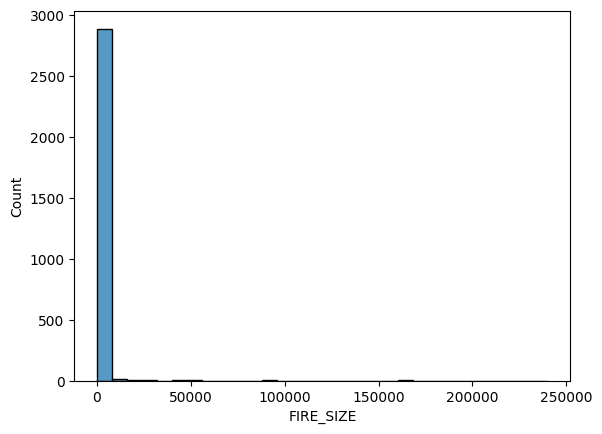

In [17]:
sns.histplot(data=fires_data, x="FIRE_SIZE", bins=30, kde=False)
plt.show()
# incredibly skewed distribution

In [18]:
fires_data_log["FIRE_SIZE"] = np.log10(fires_data["FIRE_SIZE"])

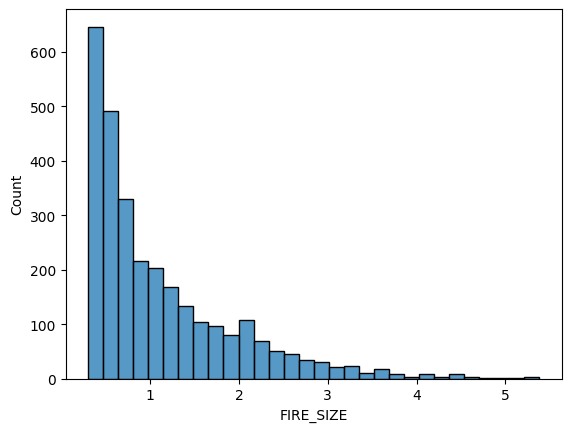

In [19]:
sns.histplot(data=fires_data_log, x="FIRE_SIZE", bins=30, kde=False)
plt.show()
# log scaling distribution to give less skew
# originally was very skewed since most fires in the dataset were small. log transform ranks fires on order of magnitude from 10^0 acres to 10^5 acres
#   fixes distribution a bit
#   encourages model to predict bigger fires rather than gtting low loss for always predicting a small fire
#   likely a better model, but less interpretable
#   comparable to richter scale for earthquakes
# potentially apply log to the log scaled values to make the distribution almost normal
#   really hard to interpret, also small changes in predicted value (ex 1.01 vs 1.03) result in tenfold of tenfold of a difference in actual fire size

c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


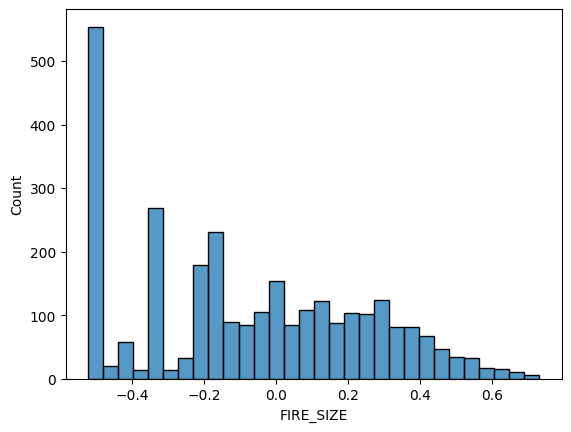

In [20]:
sns.histplot(data=np.log10(fires_data_log), x="FIRE_SIZE", bins=30, kde=False)
plt.show()

In [21]:
# use iqr clipping for log dist (precip, wind)
# use zscore clipping for normal (max temp, humidity)

In [22]:
iqr_cols = ["windspeed_mph"] # not including precip bc it has such a long and small tail, everything's just gonna get clipped
zscore_cols = ["temp_max_F", "humidity_pct"]

In [23]:
# iqr clipping
# iqr hold middle 50% of data, multiply by something to loosen the clipping range
for col in iqr_cols:
    Q1 = fires_data[col].quantile(0.25)
    Q3 = fires_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.9 * IQR
    upper = Q3 + 1.9 * IQR
    fires_data[col] = fires_data[col].clip(lower, upper)

In [24]:
# zscore 
k = 3 # 3 std from mean (99.7%)
for col in zscore_cols:
    mean = fires_data[col].mean()
    std = fires_data[col].std()
    lower = mean - k * std
    upper = mean + k * std
    fires_data[col] = fires_data[col].clip(lower, upper)

In [25]:
fires_data

,FIRE_SIZE,temp_max_F,humidity_pct,precip_in,windspeed_mph
0,2.0,95.54,69.0,0.0,13.486638
1,3.3,93.20,67.0,0.0,7.271597
2,340.0,82.76,72.0,0.0,8.949658
3,21.6,75.74,69.0,0.0,6.712244
4,8.0,78.80,16.0,0.0,14.106588
...,...,...,...,...,...
2921,47.0,80.78,84.0,0.0,8.328154
2922,7.0,79.88,93.0,0.0,12.865134
2923,78.8,102.74,50.0,0.0,7.147296
2924,110.0,93.92,60.0,0.0,7.022996


In [26]:
X = fires_data.drop("FIRE_SIZE", axis=1)
y = fires_data_log["FIRE_SIZE"] # or just fire_data

In [27]:
X

,temp_max_F,humidity_pct,precip_in,windspeed_mph
0,95.54,69.0,0.0,13.486638
1,93.20,67.0,0.0,7.271597
2,82.76,72.0,0.0,8.949658
3,75.74,69.0,0.0,6.712244
4,78.80,16.0,0.0,14.106588
...,...,...,...,...
2921,80.78,84.0,0.0,8.328154
2922,79.88,93.0,0.0,12.865134
2923,102.74,50.0,0.0,7.147296
2924,93.92,60.0,0.0,7.022996


In [28]:
y

0       0.301030
1       0.518514
2       2.531479
3       1.334454
4       0.903090
          ...   
2921    1.672098
2922    0.845098
2923    1.896526
2924    2.041393
2925    1.732394
Name: FIRE_SIZE, Length: 2926, dtype: float64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [30]:
power_cols = ["precip_in", "windspeed_mph"]
standard_cols = ["temp_max_F", "humidity_pct"] 

In [31]:
std_scaler = StandardScaler()
pwr_scaler = PowerTransformer()

In [32]:
X_train[standard_cols] = std_scaler.fit_transform(X_train[standard_cols])
X_train[power_cols] = pwr_scaler.fit_transform(X_train[power_cols])


X_test[standard_cols] = std_scaler.transform(X_test[standard_cols])
X_test[power_cols] = pwr_scaler.transform(X_test[power_cols])

# fit_transform on train data and only transform on test data to prevent data leakage

In [33]:
X_train

,temp_max_F,humidity_pct,precip_in,windspeed_mph
1778,-1.476509,1.509775,2.257069,0.191397
441,-1.184050,-0.739360,-0.314962,0.049421
52,0.456972,-1.097177,-0.314962,0.633834
1983,-2.077675,0.794141,3.619989,1.633967
1603,0.310742,0.896375,-0.314962,-0.415515
...,...,...,...,...
2121,-0.599131,0.385208,-0.314962,1.213483
1424,-0.452901,0.743025,-0.314962,-0.159792
1725,-1.492756,1.305308,1.306567,0.354282
2254,-0.290424,-0.279309,3.620034,-1.029905


In [34]:
model = Sequential([
    #Dense(128,activation="relu"),
    Dense(128, activation="relu"),
    Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1)
])

In [35]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [36]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5592 - mae: 0.9210 - val_loss: 0.7847 - val_mae: 0.6607
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7266 - mae: 0.6274 - val_loss: 0.7466 - val_mae: 0.6414
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7683 - mae: 0.6442 - val_loss: 0.7521 - val_mae: 0.6655
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7905 - mae: 0.6685 - val_loss: 0.7344 - val_mae: 0.6516
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7178 - mae: 0.6434 - val_loss: 0.7254 - val_mae: 0.6604
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7295 - mae: 0.6541 - val_loss: 0.7276 - val_mae: 0.6323
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7613 - mae: 0.6605 - val_loss: 0.7293 - val_mae: 0.6290
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8070 - mae: 0.6598 - val_loss: 0.7173 - val_mae: 0.6519
Epoch 9/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7149 - mae: 

In [37]:
loss = model.evaluate(X_test, y_test)
print(f"Test loss mae: {loss[1]}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7748 - mae: 0.6825 
Test loss mae: 0.6555346250534058


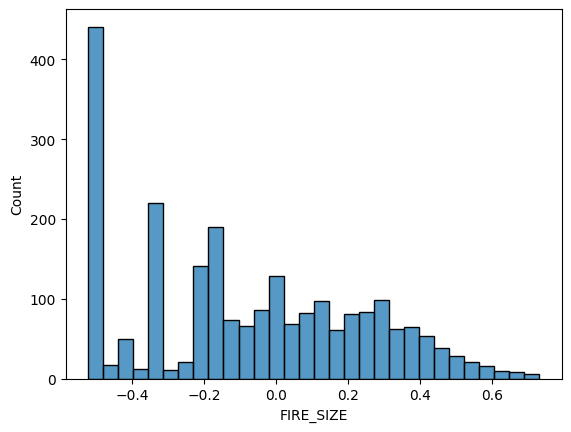

In [ ]:
sns.histplot(data=np.log10(y_train.to_frame()), x="FIRE_SIZE", bins=30, kde=False) # double log scale :)
plt.show()

In [38]:
y_pred = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<Axes: ylabel='Count'>

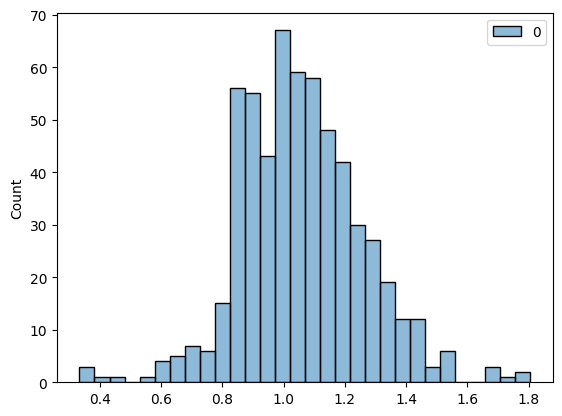

In [40]:
sns.histplot(data=y_pred, bins=30, kde=False)


In [ ]:
y_test.describe() # variance is 0.73, meaning model does slightly better than guessing the mean

count    586.000000
mean       1.124561
std        0.861103
min        0.301030
25%        0.477121
50%        0.845098
75%        1.544068
max        4.707570
Name: FIRE_SIZE, dtype: float64

In [141]:
x_std = std_scaler.transform([[73,34]]) # temp hum
x_pwr = pwr_scaler.transform([[0,13]]) # rain, wind


c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [142]:
x_std

array([[-0.99291398, -1.76169412]])

In [143]:
x_pwr

array([[-0.31496164,  1.87794553]])

In [144]:
x_input = np.concatenate((x_std,x_pwr), axis=1)


In [145]:
y_pred = model.predict(x_input)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[1.3881556]]


In [ ]:
# silverado fire - 13k acres, model predicted 2.58 so 300 or so acres
# small fire 62 acres model predicted 2.45
# large fire 400k acres model predicted 2.87
# small fire 600 acres model predicted 1.38

In [ ]:

# do NOT do batching bc dataset is small

In [ ]:
# add new feature - proximity to city/fire station
# add new feature - satellite imaging (dryness, topography, amount vegetation )NVDI))
# 